# Cerate Cue Locations List

For each image, use the boudning box and the image size to find the:
- image center 
- object cue location 
- fixation location (5,10,15 degrees)

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import glob

In [3]:
#imnum = '000000532761'; 
#imnum = '000000579635'; 
imnum = '000000009590'
imnum = '000000281409'
bbx_xywh = (427,228,24,49)
#bbx_xywh = (463,304,34,12)
#bbx_xywh = (117,191,65,46)
#bbx_xywh = (500,150,65,46)

ppd = 16

#read in image
# im = cv2.imread(f'/home/gridsan/vdutell/RosenholtzLab_shared/val2017_select/{imnum}.jpg')
# im = cv2.imread(f'/home/gridsan/vdutell/RosenholtzLab_shared/cocop_stims3/newims/{imnum}.jpg')
im = cv2.imread(f'/home/gridsan/groups/RosenholtzLab/detection_repos/final_experiment_present_images/{imnum}.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 


In [4]:
def find_fixation_location(img, bbx_xywh, eccentricity, ppd, plot=False):

    #get desired distance
    fd  = eccentricity * ppd
    
    ##TODO: Possibly base this off of distance from bbx edge rather than center.
    object_loc_center = (bbx_xywh[0] + (bbx_xywh[2]//2), bbx_xywh[1] + (bbx_xywh[3]//2))
    #object_loc_edge = 
    object_loc = object_loc_center
    
    #get image center
    imshape = np.shape(img)
    img_center = (imshape[1]//2, imshape[0]//2)
    
    #get angle to center
    dy = object_loc[1] - img_center[1]
    dx = object_loc[0] - img_center[0]
    theta = np.arctan2(dy,dx)
    
    #solve for fixation location
    fix_dy = np.sin(theta)*fd
    fix_dx = np.cos(theta)*fd
    #add or subtract position from object center based on quadrant
    if(fix_dy > object_loc[1]):
        fix_y = object_loc[1] + fix_dy
    else:
        fix_y = object_loc[1] - fix_dy
    if(fix_dx > object_loc[0]):
        fix_x = object_loc[0] + fix_dx
    else:
        fix_x = object_loc[0] - fix_dx

    #print(img_center, object_loc)
    #print(dy,dx,theta)
    #pring(fix_x, fix_y)
    #plotting
    if(plot):
        rect = patches.Rectangle((bbx_xywh[0], bbx_xywh[1]), bbx_xywh[2], bbx_xywh[3], linewidth=1, edgecolor='r', facecolor='none')
        fig,ax = plt.subplots()
        ax.imshow(im)
        ax.add_patch(rect)
        ax.scatter(*object_loc,label='object')
        plt.scatter(*img_center,label='center')
        plt.scatter(fix_x,fix_y,label='fixation')
        plt.legend()
        plt.show()

    return((fix_x,fix_y))

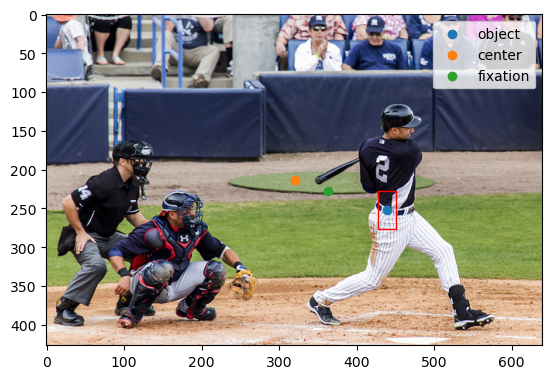

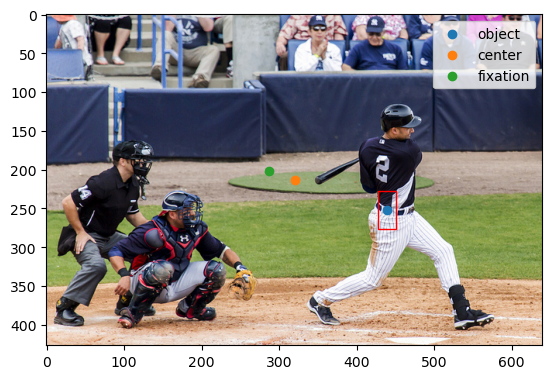

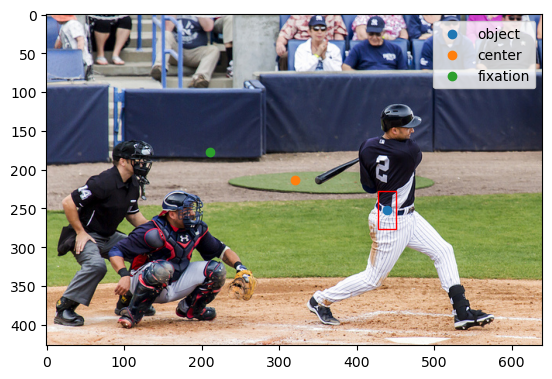

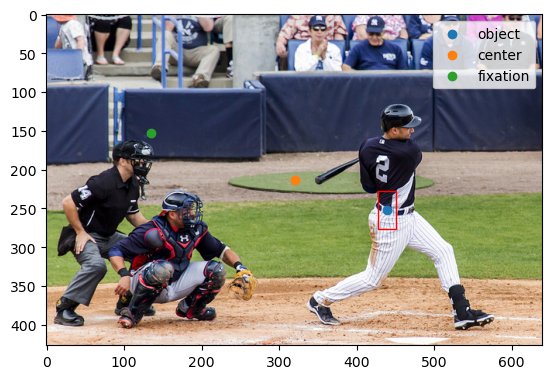

(134.91414767203952, 152.3416114219289)

In [5]:
find_fixation_location(im,bbx_xywh, 5, 16,plot=True)
find_fixation_location(im,bbx_xywh, 10, 16,plot=True)
find_fixation_location(im,bbx_xywh, 15, 16,plot=True)
find_fixation_location(im,bbx_xywh, 20, 16,plot=True)

## All Images

In [5]:
imfolder = '/home/gridsan/vdutell/RosenholtzLab_shared/cocop_stims3/newims'
#imfolder = '/home/gridsan/vdutell/RosenholtzLab_shared/cocop_stims_formatted/keep/present/original'
imlist = glob.glob(f'{imfolder}/*.jpg', recursive=False)
len(imlist)

61

In [9]:
import pandas as pd
bounding_box_list = '/home/gridsan/vdutell/RosenholtzLab_shared/COCOPStimsFinalFull.csv'

bbx_list = pd.read_table(bounding_box_list,delimiter=',',header=0)
bbx_list.columns = ['image_name','object_name','index','bbx_x_16','bbx_y_16','bbx_w_16','bbx_h_16']
#bbx_list.drop(columns='used')

rmlist = ['000000415536.jpg','000000514376.jpg','000000548524.jpg','000000567640.jpg','000000183965.jpg',
          '000000061108.jpg','000000122606.jpg','000000125245.jpg','000000179653.jpg',
          '000000221872.jpg','000002242222.jpg','000000378116.jpg','000000489046.jpg',
          '000000407473.jpg','000000479636.jpg','000000014038.jpg','000000123633.jpg','000000135561.jpg',
 '000000156278.jpg','000000171190.jpg','000000326082.jpg','000000361586.jpg','000000367095.jpg','000000447169.jpg',
 '000000546964.jpg']
print(bbx_list.shape)
bbx_list = bbx_list[~bbx_list['image_name'].isin(rmlist)]
print(bbx_list.shape)


(56, 7)
(39, 7)


In [8]:
#create empty columns

#imsizes
bbx_list['imsize_x_16'] = ''
bbx_list['imsize_y_16'] = ''
bbx_list['imsize_x_22'] = ''
bbx_list['imsize_y_22'] = ''

#bounding boxes
bbx_list['bbx_x_22'] = ''
bbx_list['bbx_y_22'] = ''
bbx_list['bbx_w_22'] = ''
bbx_list['bbx_h_22'] = ''

#fixation locations
for ecc in [5,10,15,20]:
    for ppd in [16,22]:
        bbx_list[f'fx_x_{ppd}_{ecc}'] = ''
        bbx_list[f'fx_y_{ppd}_{ecc}'] = ''

#fill in values
for imname in bbx_list.image_name:
    print(imname)
    #read in image
    try:
        im = cv2.imread(f'/home/gridsan/vdutell/RosenholtzLab_shared/cocop_stims3/newims/{imname}')
    except:
        im = cv2.imread(f'/home/gridsan/vdutell/RosenholtzLab_shared/cocop_stims3/newims/{imname}')

    if(im is not None):
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 
        row = bbx_list.loc[bbx_list['image_name'] == imname]
        x = row['bbx_x_16'].item()
        y = row['bbx_y_16'].item()
        w = row['bbx_w_16'].item()
        h = row['bbx_h_16'].item()
        bbx_xywh = [x,y,w,h]
        #print(bbx_xywh)
        #loop through eccentricities
        for ppds in [16,22]:
            if(ppds==22):
                #resize image
                (imsize_y,imsize_x, _) = np.round(np.multiply(np.shape(im), (22/16))).astype(int)
                #imsize_x = int(np.shape(im)[1]*(22/16))
                #imsize_y = int(np.shape(im)[0]*(22/16))
                im = cv2.resize(im,(imsize_x,imsize_y))
                #plt.imshow(im)
                #plt.show()
                #calculate new bounding box
                bbx_xywh = np.round(np.multiply(bbx_xywh, (22/16))).astype(int)
                bbx_list.loc[bbx_list['image_name'] == imname, f'bbx_x_{ppds}'] = bbx_xywh[0]
                bbx_list.loc[bbx_list['image_name'] == imname, f'bbx_y_{ppds}'] = bbx_xywh[1]
                bbx_list.loc[bbx_list['image_name'] == imname, f'bbx_w_{ppds}'] = bbx_xywh[2]
                bbx_list.loc[bbx_list['image_name'] == imname, f'bbx_h_{ppds}'] = bbx_xywh[3]
            #image sizes
            bbx_list.loc[bbx_list['image_name'] == imname, f'imsize_x_{ppds}'] = np.shape(im)[1]
            bbx_list.loc[bbx_list['image_name'] == imname, f'imsize_y_{ppds}'] = np.shape(im)[0]
            for ecc in [5,10,15,20]:
                fx_x, fx_y = find_fixation_location(im, bbx_xywh, ecc, ppds, plot=False)
                #print(fx_x, fx_y)
                #bbx_list[f'fx_x_{ppds}_{ecc}'] = fx_x
                #bbx_list[f'fx_y_{ppds}_{ecc}'] = fx_y
                bbx_list.loc[bbx_list['image_name'] == imname, f'fx_x_{ppds}_{ecc}'] = fx_x
                bbx_list.loc[bbx_list['image_name'] == imname, f'fx_y_{ppds}_{ecc}'] = fx_y

    else:
        print(imname)
        


        

000000001268.jpg
000000009769.jpg
000000011197.jpg
000000013546.jpg
000000016439.jpg
000000018150.jpg
000000018380.jpg
000000019042.jpg
000000061268.jpg
000000063602.jpg
000000067616.jpg
000000097994.jpg
000000104669.jpg
000000119445.jpg
000000119516.jpg
000000120572.jpg
000000142238.jpg
000000186422.jpg
000000203864.jpg
000000209530.jpg
000000222299.jpg
000000224222.jpg
000000226417.jpg
000000281409.jpg
000000331817.jpg
000000481390.jpg
000000484351.jpg
000000491008.jpg
000000507473.jpg
000000509258.jpg
000000572900.jpg
000000577932.jpg
000000579635.jpg
000000009590.jpg
000000255165.jpg
000000311002.jpg
000000322163.jpg
000000441586.jpg
000000529148.jpg
000000545100.jpg


In [47]:
#bbx_list['image_name'==imname]
bbx_list
bbx_list.to_csv(f'/home/gridsan/vdutell/RosenholtzLab_shared/cocop_bbx_fixations_new_fixed.csv',index=False)

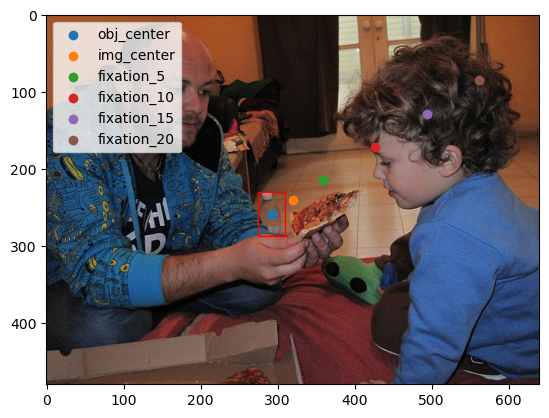

In [16]:
## Test it out (16pdd)
#imnum = '000000409211'
#imnum =  '000000532761'
#imnum = '000000543581'
#imnum = '000000416837'
#imnum = '000000545958' #cow
# imnum = '000000067213'
# imnum = '000000335529'
# imnum = '000000391290'
# imnum = '000000577864'
# imnum = '000000569059'
# imnum = '000000391290'
# imnum = '000000577932'
#imnum = '000000507473'
#imnum = '000000311002'
#imnum = '000000009769'
imnum = '000000018150'

im = cv2.imread(f'/home/gridsan/vdutell/RosenholtzLab_shared/cocop_stims3/newims/{imnum}.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 

fig,ax = plt.subplots()
ax.imshow(im)
row = bbx_list.loc[bbx_list['image_name'] == f'{imnum}.jpg']
rect = patches.Rectangle((row['bbx_x_16'].item(),
                          row['bbx_y_16'].item()),
                          row['bbx_w_16'].item(),
                          row['bbx_h_16'].item(), linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.scatter(row['bbx_x_16'].item() + row['bbx_w_16'].item()//2, row['bbx_y_16'].item() + row['bbx_h_16'].item()//2,label='obj_center')
plt.scatter(row['imsize_x_16'].item()//2, row['imsize_y_16'].item()//2,label='img_center')
for ecc in [5,10,15,20]:
    plt.scatter(row[f'fx_x_16_{ecc}'].item(),row[f'fx_y_16_{ecc}'].item(),label=f'fixation_{ecc}')
plt.legend()
plt.show()

In [35]:
## Test it out (22pdd)
#imnum =  '000000532761'
#imnum = '000000409211'
#imnum = '000000543581'
imnum = '000000125245'

im = cv2.imread(f'/home/gridsan/vdutell/RosenholtzLab_shared/cocop_stims/{imnum}.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 

imsize_y = int(np.shape(im)[0]*(22/16))
imsize_x = int(np.shape(im)[1]*(22/16))
im = cv2.resize(im,(imsize_x,imsize_y))

fig,ax = plt.subplots()
ax.imshow(im)
row = bbx_list.loc[bbx_list['image_name'] == f'{imnum}.jpg']
rect = patches.Rectangle((row['bbx_x_22'].item(),
                          row['bbx_y_22'].item()),
                          row['bbx_w_22'].item(),
                          row['bbx_h_22'].item(), linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.scatter(row['bbx_x_22'].item() + row['bbx_w_22'].item()//2, row['bbx_y_22'].item() + row['bbx_h_22'].item()//2,label='obj_center')
plt.scatter(row['imsize_x_22'].item()//2, row['imsize_y_22'].item()//2,label='img_center')
for ecc in [5,10,15]:
    plt.scatter(row[f'fx_x_22_{ecc}'].item(),row[f'fx_y_22_{ecc}'].item(),label=f'fixation_{ecc}')
plt.legend()
plt.show()

[ WARN:0@2478.894] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/gridsan/vdutell/RosenholtzLab_shared/cocop_stims/000000125245.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


112.61308937953538 240.14022014565143
187.22617875907076 211.28044029130282
261.83926813860614 182.42066043695422


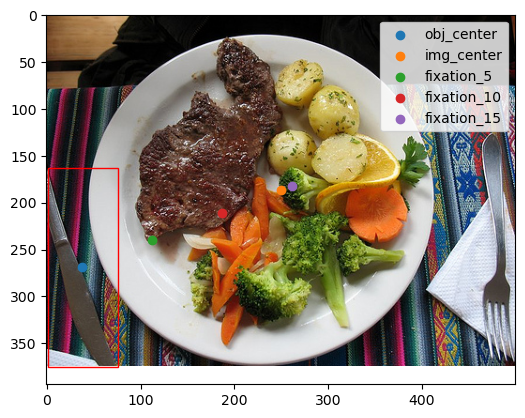

In [40]:
## Test it out (16pdd)
#imnum = '000000409211'
#imnum =  '000000532761'
#imnum = '000000543581'
#imnum = '000000416837'
#imnum = '000000545958' #cow
#imnum = '000000067213'
imnum = '000000104669'

im = cv2.imread(f'/home/gridsan/vdutell/RosenholtzLab_shared/cocop_stims/{imnum}.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 

fig,ax = plt.subplots()
ax.imshow(im)
row = bbx_list.loc[bbx_list['image_name'] == f'{imnum}.jpg']
rect = patches.Rectangle((row['bbx_x_16'].item(),
                          row['bbx_y_16'].item()),
                          row['bbx_w_16'].item(),
                          row['bbx_h_16'].item(), linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.scatter(row['bbx_x_16'].item() + row['bbx_w_16'].item()//2, row['bbx_y_16'].item() + row['bbx_h_16'].item()//2,label='obj_center')
plt.scatter(row['imsize_x_16'].item()//2, row['imsize_y_16'].item()//2,label='img_center')
for ecc in [5,10,15]:
    print(row[f'fx_x_16_{ecc}'].item(),row[f'fx_y_16_{ecc}'].item())
    plt.scatter(row[f'fx_x_16_{ecc}'].item(),row[f'fx_y_16_{ecc}'].item(),label=f'fixation_{ecc}')
plt.legend()
plt.show()

In [41]:
im = cv2.imread(f'/home/gridsan/vdutell/RosenholtzLab_shared/cocop_stims/{imnum}.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 
im.shape

(375, 500, 3)

In [42]:
row

,image_name,object_name,index,bbx_x_16,bbx_y_16,bbx_w_16,bbx_h_16,used,imsize_x_16,imsize_y_16,...,fx_x_22_5,fx_y_22_5,fx_x_16_10,fx_y_16_10,fx_x_22_10,fx_y_22_10,fx_x_16_15,fx_y_16_15,fx_x_22_15,fx_y_22_15
13,000000104669.jpg,knife,3,1,163,75,212,1,500,375,...,154.704234,330.606595,187.226179,211.28044,257.408468,291.21319,261.839268,182.42066,360.112702,251.819786
